 # 🎬 Análisis exploratorio de datos sobre películas 🎬

## 🗂️ Origen Dataset

Los registros de las películas y series se extrajeron de lo mejor y más valorado de Netflix, fueron recopilados con éxito desde IMDB. 

## 📊 Variables incluidas en el dataset

Enlace al póster

Título de la serie

Año de estreno

Certificado

Duración

Género

Clasificación IMDb

Resumen

Metapuntuación

Director

Estrella 1

Estrella 2

Estrella 3

Estrella 4

Número de votos

Ganancias brutas

## 🔧 Primer paso: limpieza de datos
Antes de iniciar el análisis, llevaremos a cabo una pequeña depuración de la base de datos para garantizar resultados más precisos y confiables.

In [ ]:
import pandas as pd

In [ ]:
# Loading data from a CSV file
df = pd.read_csv("imdb_top_1000.csv")


👁️‍🗨️ Vista previa del DataFrame

Mostraremos las primeras 5 filas para obtener una visión rápida de la estructura y confirmar que los datos se cargaron correctamente antes de iniciar el análisis.

In [ ]:

df.head(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


* Con este código se muestra el tipo de dato para cada columna.

In [ ]:
# Data types of each column

df.dtypes

Poster_Link       object
Series_Title      object
Released_Year      Int64
Certificate       object
Runtime            Int64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

* Para este análisis trabajaremos con 999 registros, ya que hay un dato faltante. 

In [ ]:
# Check the structure of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Poster_Link    1000 non-null   string  
 1   Series_Title   1000 non-null   string  
 2   Released_Year  999 non-null    Int64   
 3   Certificate    899 non-null    category
 4   Runtime        1000 non-null   Int64   
 5   Genre          1000 non-null   category
 6   IMDB_Rating    1000 non-null   float64 
 7   Overview       1000 non-null   string  
 8   Meta_score     843 non-null    Int64   
 9   Director       1000 non-null   string  
 10  Star1          1000 non-null   string  
 11  Star2          1000 non-null   string  
 12  Star3          1000 non-null   string  
 13  Star4          1000 non-null   string  
 14  No_of_Votes    1000 non-null   int64   
 15  Gross          831 non-null    Int64   
dtypes: Int64(4), category(2), float64(1), int64(1), string(8)
memory usage: 126.7 K

* Convertimos la columna de "Año de estreno" en enteros, hacemos lo mismo con la columna "Duración"

In [ ]:
# 2.1 Released_Year  → entero (admite nulos como <NA>)
df['Released_Year'] = (
    pd.to_numeric(df['Released_Year'], errors='coerce')
      .astype('Int64')                     # entero nullable de pandas
)

In [ ]:
# 2.2 Runtime → minutos (entero)
df['Runtime'] = (
    df['Runtime']
      .str.replace(r'\D+', '', regex=True)  # elimina " min" u otros no‑dígitos
      .astype('Int64')
)

* Se convierten dos variables a Categoría

In [ ]:
# 2.3 Certificate y Genre → categoría (ahorra memoria)
cat_cols = ['Certificate', 'Genre']
df[cat_cols] = df[cat_cols].astype('category')

In [ ]:
# 2.4 Meta_score → entero (nullable)
df['Meta_score'] = (
    pd.to_numeric(df['Meta_score'], errors='coerce')
      .astype('Int64')
)

In [ ]:
# 2.5 Gross → número entero de dólares (o float si prefieres)
df['Gross'] = (
    df['Gross']
      .str.replace(',', '', regex=False)    # quita separador de miles
      .replace({'': None})                  # cadenas vacías → nulos
      .astype('Int64')
)

In [ ]:
# 2.6 Columnas de texto que conviene conservar como string
text_cols = [
    'Poster_Link', 'Series_Title', 'Overview', 'Director',
    'Star1', 'Star2', 'Star3', 'Star4'
]
df[text_cols] = df[text_cols].astype('string')

# 2.7 No_of_Votes ya es int64 → lo dejamos igual
# IMDB_Rating ya es float64 → sin cambios

* Se da un ultimo vistazo a los cambios realizados en las columnas.

In [ ]:
# --- 3. Comprobación rápida ----------------------------------------
print(df.dtypes)
df.head()

Poster_Link      string[python]
Series_Title     string[python]
Released_Year             Int64
Certificate            category
Runtime                   Int64
Genre                  category
IMDB_Rating             float64
Overview         string[python]
Meta_score                Int64
Director         string[python]
Star1            string[python]
Star2            string[python]
Star3            string[python]
Star4            string[python]
No_of_Votes               int64
Gross                     Int64
dtype: object


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


# 📈 Análisis descriptivo

In [ ]:

num_cols = ['Released_Year', 'Runtime', 'IMDB_Rating',
            'Meta_score', 'No_of_Votes', 'Gross']
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Released_Year,999.0,1991.217217,23.297025,1920.0,1976.0,1999.0,2009.0,2020.0
Runtime,1000.0,122.891,28.093671,45.0,103.0,119.0,137.0,321.0
IMDB_Rating,1000.0,7.9493,0.275491,7.6,7.7,7.9,8.1,9.3
Meta_score,843.0,77.97153,12.376099,28.0,70.0,79.0,87.0,100.0
No_of_Votes,1000.0,273692.911,327372.703934,25088.0,55526.25,138548.5,374161.25,2343110.0
Gross,831.0,68034750.873646,109750043.192185,1305.0,3253559.0,23530892.0,80750893.5,936662225.0


El conjunto de datos contiene información sobre películas lanzadas en un amplio rango de años, desde el 1920 hasta el año 2020.
La duración promedio de las películas es de 122 minutos, es decir, un poco más de dos horas, con una variabilidad moderada.
Las películas en este conjunto de datos tienden a tener calificaciones altas en IMDb y Metacritic.
El número máximo de votos recibidos por una película fueron 100, y la menor cantidad de votos recaudados fueron 28. 
En cuanto a la recaudación bruta se mpuede observar que el promedio es de 68.034.750 millones de dólares 
Por otro lado, el número de votos y la recaudación brutan muestran una dispersión extremadamente alta, lo que sugiere que hay algunas películas muy populares y exitosas que destacan significativamente del resto. Adicional a eso se encuentra que existe una cantidad notable de valores faltantes en las variables Meta_score y Gross.

* El siguiente código proporciona la cantidad de valores faltantes por columna, se puede observar que la columna con más faltantes es: Gross

In [ ]:
# Conteo absoluto de nulos por columna
df.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      1
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [ ]:
nulls = (
    df.isna()
      .mean()                           # proporción de nulos
      .mul(100)                         # a porcentaje
      .round(2)
      .to_frame(name='% nulos')
      .assign(Conteo=df.isna().sum())   # agrega columna con el número
      .sort_values('% nulos', ascending=False)
)

nulls


,% nulos,Conteo
Gross,16.9,169
Meta_score,15.7,157
Certificate,10.1,101
Released_Year,0.1,1
Runtime,0.0,0
Genre,0.0,0
Series_Title,0.0,0
Poster_Link,0.0,0
Overview,0.0,0
IMDB_Rating,0.0,0



## * 1era Gráfica

La mayoría de las películas en este conjunto de datos tienen calificaciones de IMDB que oscilan entre 7.6 y 8.2. 

Se puede observar una alta fercuencia en la barra centrada alrededor de 7.7. Otro pico importante se encuentra en la barras cercanas a 8.0 y 8.1.
Tambien hay algunas películas con calificaciones superiores a 8.2, aunque con menor frecuencia.

A medida que la calificación de IMDB aumenta por encima de 8.2, la frecuencia de películas con esas calificaciones disminuye considerablemente. Hay relativamente pocas películas con calificaciones superiores a 8.5 y muy pocas con calificaciones cercanas a 9.0 o superiores.

Por último, la primera barra visible comienza alrededor de 7.6, lo que coincide con el valor mínimo reportado en las estadísticas descriptivas previas. La última barra significativa se encuentra alrededor de 9.3, que también coincide con el valor máximo.

## * 2da Gráfica

El histograma de la distribución de Meta_score revela una tendencia central marcada hacia puntuaciones más altas, con un pico notable entre 70 y 90, lo que indica que la mayoría de las películas en este conjunto de datos recibieron críticas generalmente positivas. Sin embargo, la distribución también muestra una dispersión considerable, extendiéndose desde puntuaciones muy bajas (cercanas a 30) hasta la puntuación máxima de 100, sugiriendo una variabilidad significativa en la crítica de las películas, aunque las puntuaciones más bajas son mucho menos frecuentes que las altas.

## * 3era Gráfica

El histograma de la distribución de Runtime muestra una concentración significativa de películas con duraciones entre 90 y 130 minutos, con un pico alrededor de los 110-120 minutos. Sin embargo, la distribución presenta una asimetría positiva, con una cola que se extiende hacia duraciones considerablemente más largas, alcanzando incluso más de 300 minutos, lo que indica la presencia de un outlier.

## * 4ta Gráfica

El histograma de la distribución de la variable "Gross" (recaudación bruta) revela que la gran mayoría de las películas se agrupan en el extremo izquierdo del gráfico, indicando que la mayoría de ellas tuvieron una recaudación bruta relativamente baja, concentrándose significativamente cerca de cero y extendiéndose hasta aproximadamente 2 x 10^8. A medida que la recaudación bruta aumenta, la frecuencia de películas disminuye drásticamente,esto sugiere que, si bien la mayoría de las películas tienen una recaudación modesta, existen algunas películas excepcionalmente exitosas que generan ingresos brutos muy superiores al promedio, lo que explica la alta desviación estándar observada en las estadísticas descriptivas previas. 

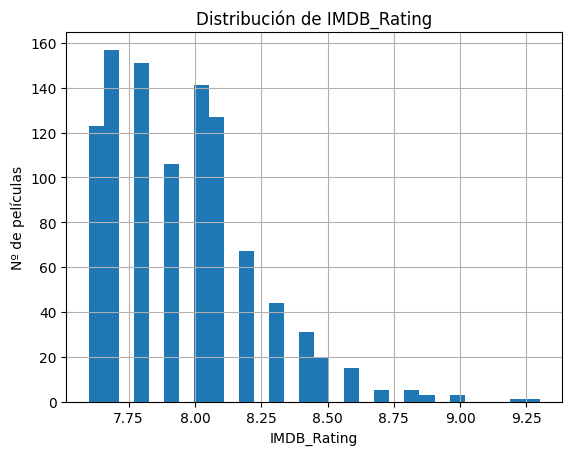

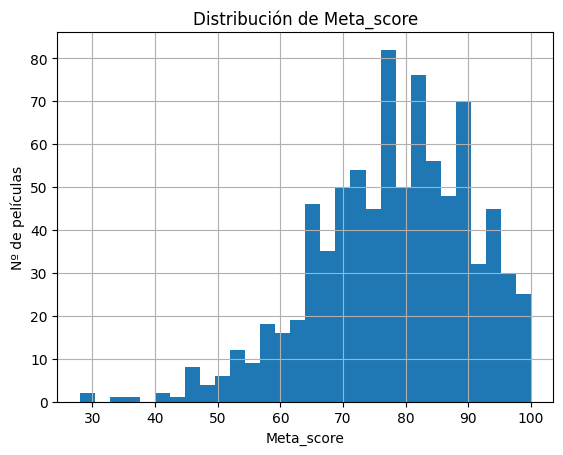

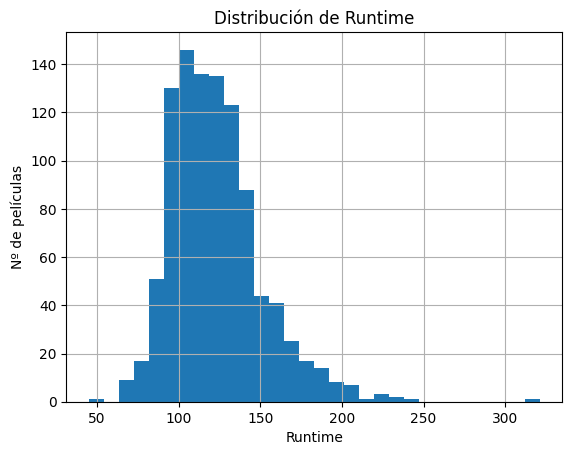

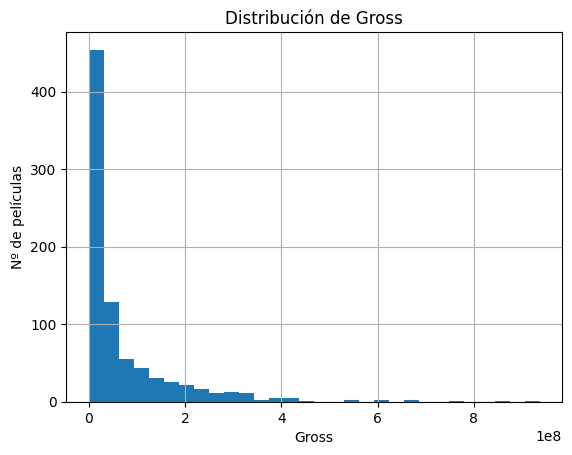

In [ ]:
import matplotlib.pyplot as plt

for col in ['IMDB_Rating', 'Meta_score', 'Runtime', 'Gross']:
    df[col].dropna().hist(bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col); plt.ylabel('Nº de películas')
    plt.show()


In [ ]:
    plt.title(f'Distribución de {col}')
    plt.xlabel(col); plt.ylabel('Nº de películas')
    plt.show()


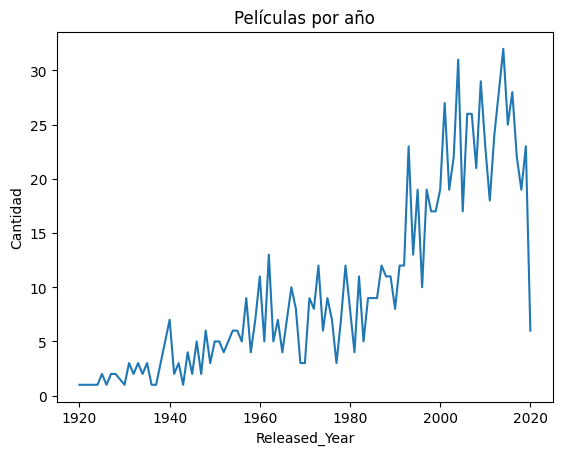

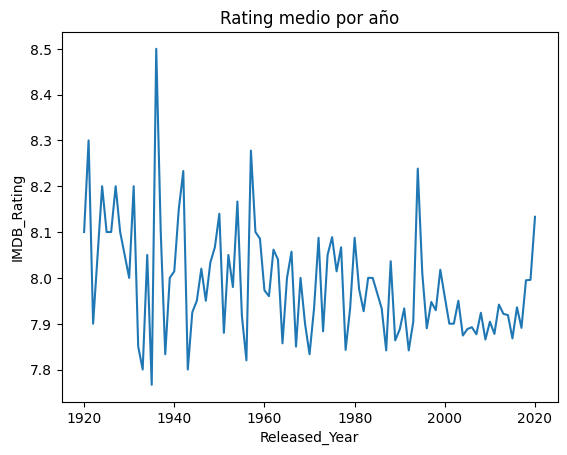

In [ ]:
df.groupby('Released_Year')['Series_Title'].count().plot()
plt.title('Películas por año'); plt.ylabel('Cantidad'); plt.show()

df.groupby('Released_Year')['IMDB_Rating'].mean().plot()
plt.title('Rating medio por año'); plt.ylabel('IMDB_Rating'); plt.show()


* El gráfico de "Películas por año" muestra un aumento en la cantidad de películas lanzadas a lo largo de los años. Inicialmente, desde 1920 hasta aproximadamente 1960, la producción se mantuvo relativamente baja, con fluctuaciones anuales pero sin un crecimiento significativo. A partir de la década de 1960, se observa un incremento gradual en la cantidad de películas, con un crecimiento más pronunciado a partir de la década de 1990. El pico de producción parece ocurrir alrededor del año 2015, seguido de un descenso notable hacia el final del período analizado, alrededor de 2020. 

* Por otro laado, el gráfico "Rating por año" muestra la evolución de la calificación promedio de las películas en IMDB a lo largo del tiempo. A pesar de las fluctuaciones anuales, la calificación media se mantiene relativamente estable, oscilando generalmente entre 7.8 y 8.1. Se observan algunos picos aislados, como el notable aumento alrededor de 1935, que podrían indicar la presencia de películas excepcionalmente bien valoradas en esos años. Sin embargo, no se aprecia una tendencia clara de aumento o disminución en la calidad promedio de las películas a lo largo del periodo analizado, sugiriendo que, en promedio, la recepción crítica (según IMDB) de las películas ha permanecido constante a lo largo de los años.

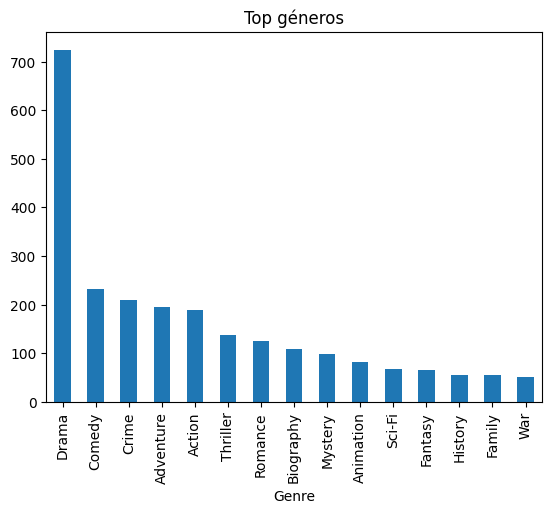

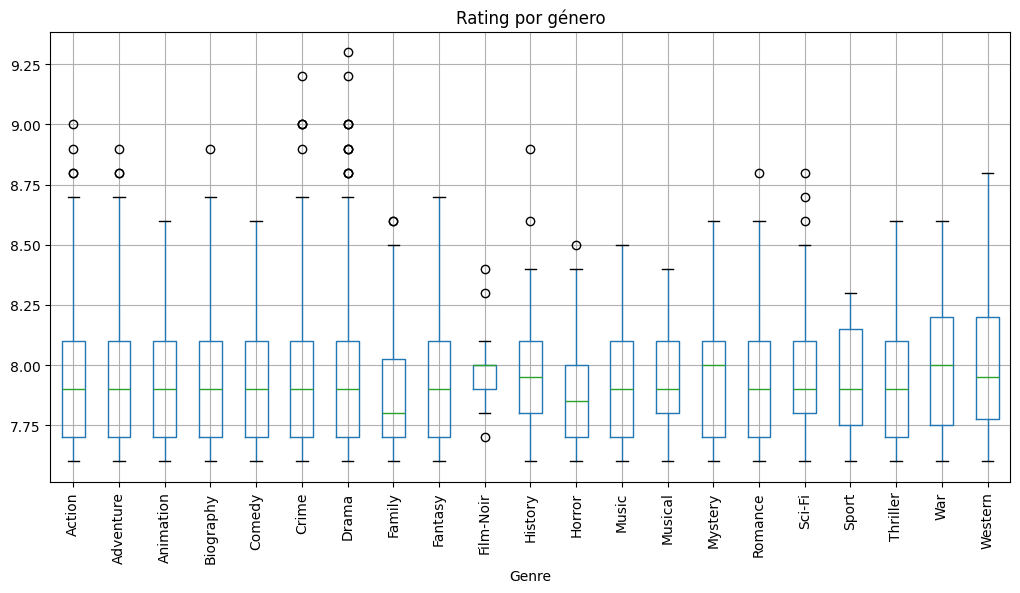

In [ ]:
df_gen = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')

# Recuento por género
top_gen = (df_gen['Genre']
           .value_counts()
           .head(15))
top_gen.plot(kind='bar')
plt.title('Top géneros'); plt.show()

# Rating por género
df_gen.boxplot(column='IMDB_Rating', by='Genre', rot=90, figsize=(12,6))
plt.title('Rating por género'); plt.suptitle('')
plt.show()


* El gráfico de barras titulado "Top géneros" muestra la frecuencia de diferentes géneros de películas en la data. El género Drama es, el más frecuente, superando significativamente a todos los demás con más de 700 películas. Le siguen, aunque a una distancia considerable, Comedy y Crime, ambos con poco más de 200 películas. Adventure y Action también presentan una frecuencia relativamente alta, acercándose a las 200 películas. A partir de ahí, la frecuencia de los géneros disminuye de manera constante. Géneros como Thriller, Romance, Biography y Mystery tienen una presencia moderada, mientras que Animation, Sci-Fi, Fantasy, History, Family y War son los menos comunes en este conjunto de datos, con frecuencias inferiores a 100. En resumen, el género Drama domina claramente, seguido por un grupo de géneros populares como Comedia, Crimen, Aventura y Acción, mientras que otros géneros tienen una representación mucho menor.

* El gráfico de cajas titulado "Rating por género" compara la distribución de las calificaciones entre diferentes géneros de películas. Si bien la calificación promedio (representada por la mediana) no varía mucho entre los géneros, la consistencia de las calificaciones dentro de cada género (representada por el IQR) y la presencia de valores atípicos sí muestran diferencias notables. Algunos géneros tienen una recepción más uniforme, mientras que otros tienen una gama más amplia de opiniones, incluyendo algunas películas excepcionalmente bien o mal valoradas.

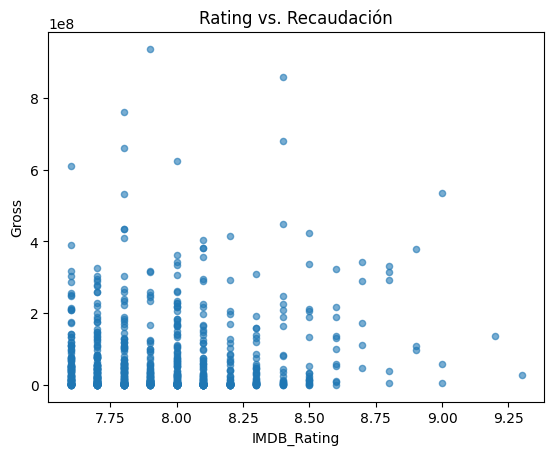

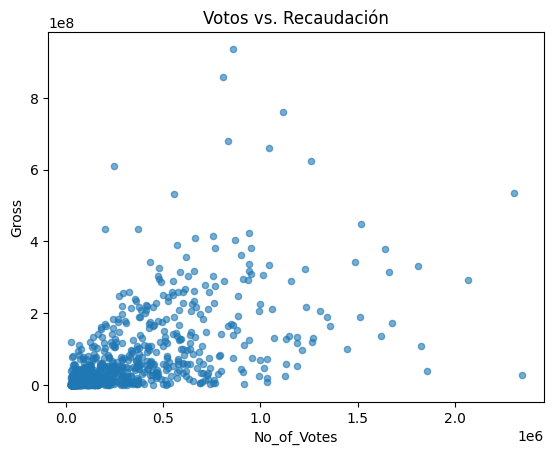

In [ ]:
df.plot.scatter(x='IMDB_Rating', y='Gross', alpha=0.6)
plt.title('Rating vs. Recaudación'); plt.show()

df.plot.scatter(x='No_of_Votes', y='Gross', alpha=0.6)
plt.title('Votos vs. Recaudación'); plt.show()


* El gráfico de dispersión titulado "Rating vs. Recaudación" examina la relación entre la calificación de IMDB y la recaudación bruta de las películas. La gran mayoría de los puntos se agrupan en la parte inferior del gráfico, indicando que la mayoría de las películas tienen una recaudación bruta relativamente baja. Por otro lado, las calificaciones de IMDB se concentran principalmente entre 7.6 y 9.0, aunque hay algunos valores que se extienden hasta 9.3. No se observa una tendencia lineal clara y fuerte entre la calificación de IMDB y la recaudación bruta. Además, se identifican algunos puntos dispersos en la parte superior del gráfico, representando películas con recaudaciones brutas significativamente más altas, estos valores atípicos no parecen estar estrictamente ligados a calificaciones particularmente altas o bajas, ya que se encuentran en un rango de calificaciones moderado a alto. (7.8 - 8.4) aproximadamente.

* Para el gráfico Votos VS Recaudación se observa una ligera tendencia positiva la cual sugiere que el número de votos en IMDB podría ser un indicador débil del potencial de recaudación bruta de una película. Las películas que atraen a una mayor audiencia (medido por el número de votos) tienen una mayor probabilidad de generar más ingresos en taquilla. Sin embargo, se puede concluir que el número de votos no es la única variable que influye en la recaudación.

A continuación se muestran los directores con más de 4 películas y su calificación promedio, al igual que las actrices y actores más frecuentes.

* Se observa que Christopher Nolan es quien lidera el rating con 8 películas y una puntuación de 8.462500, seguido por 
Francis Ford Coppola con 5 películas y un puntaje de 8.400000 y en tercer lugar, Peter Jackson con la misma cantidad qde películas que Francis.

Los 3 actores que predenominan en la base de datos son:

* Robert de Niro
* Tom Hanks
* Al Pacino

                      n_peliculas  rating_prom
Director                                      
Christopher Nolan               8     8.462500
Francis Ford Coppola            5     8.400000
Peter Jackson                   5     8.400000
Charles Chaplin                 6     8.333333
Sergio Leone                    6     8.266667
Stanley Kubrick                 9     8.233333
Akira Kurosawa                 10     8.220000
Frank Capra                     4     8.200000
Quentin Tarantino               8     8.175000
Rajkumar Hirani                 4     8.175000


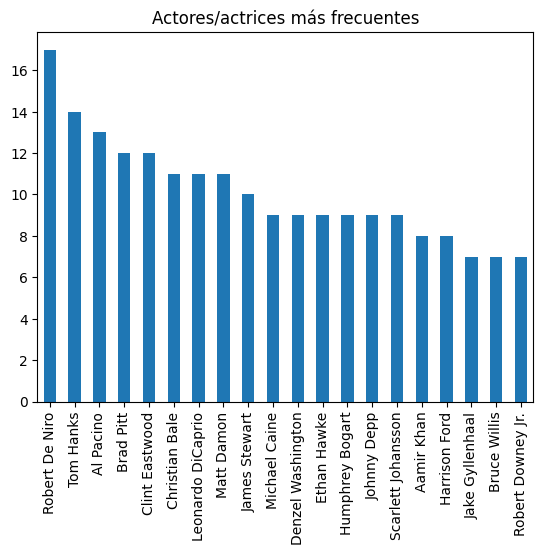

In [ ]:
# Directores con >4 películas y su rating medio
dir_stats = (df.groupby('Director')
               .agg(n_peliculas=('Series_Title','count'),
                    rating_prom=('IMDB_Rating','mean'))
               .query('n_peliculas >= 4')
               .sort_values('rating_prom', ascending=False))
print(dir_stats.head(10))

# Top estrellas por nº de apariciones
stars = (pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']])
           .value_counts()
           .head(20))
stars.plot(kind='bar'); plt.title('Actores/actrices más frecuentes'); plt.show()


In [ ]:
# Películas mejor valoradas con baja recaudación
mask = (df['IMDB_Rating'] >= 8.5) & (df['Gross'] < df['Gross'].quantile(0.25))
df.loc[mask, ['Series_Title', 'Released_Year', 'IMDB_Rating', 'Gross']]

# Películas con runtime inusualmente largo (> 3 h)
df.query('Runtime > 180')[['Series_Title','Runtime','IMDB_Rating']]


,Series_Title,Runtime,IMDB_Rating
3,The Godfather: Part II,202,9.0
5,The Lord of the Rings: The Return of the King,201,8.9
7,Schindler's List,195,8.9
25,The Green Mile,189,8.6
31,Shichinin no samurai,207,8.6
59,Avengers: Endgame,181,8.4
71,Once Upon a Time in America,229,8.4
116,Lawrence of Arabia,228,8.3
139,Bhaag Milkha Bhaag,186,8.2
140,Gangs of Wasseypur,321,8.2


* Por último se muestran las películas que tienen una duración más larga de lo habitual, en primer lugar está "Gangs of Wasseypur" con una duración de	321	minutos, es decir, 5 horas y media aproximadamente y con una puntuación de 8.2. En segundo lugar está "Gone with the Wind" con 238 minutos y una puntuación de 8.1, y en 3 lugar está "Once Upon a Time in America" con una duración de 229 min y una puntuación de 8.4.

## ✨ **Conclusiones**

1. La mayoría de las películas se mueven entre 7.6 y 8.2 en IMDB, con un máximo de frecuencia justo en 7.7; cuanto más nos acercamos a 9.0, la presencia de títulos cae en picada, lo que confirma que las películas más exitosas y sobresalientes son contadas.

2. Tras los años 60 la industria acelera, alcanza su cúspide hacia 2015 y luego retrocede, pero la calificación media apenas varía (7.9–8.1).

3. El Drama duplica al segundo género más filmado, mientras que la mediana de ratings cambia poco entre géneros; lo llamativo está en la dispersión: comedia y acción muestran opinones más polarizadas, mientras biopics y thriller son más homogéneos.

4. Ni la nota de IMDB ni el número de votos tienen gran poder explicativo para la variable “Gross”; la mayoría recauda poco y unos pocos outliers llegan a cientos de millones. Un ligero sesgo positivo con los votos sugiere que atraer audiencia ayuda, pero no es garantía de éxito.

5. La duración típica ronda entre 90-130 min, aunque existen maratones épicos como *Gangs of Wasseypur* (5 h 30 min) que, lejos de ser castigados, mantienen buenas notas. En crítica profesional (Meta_score) sucede algo parecido, predominan valoraciones 70-90, con dispersión hacia los extremos pero escasez real de películas “malas”.